# __911 Calls Capstone Project__ - ``Exercise``

<hr>

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
**Import numpy and pandas**

In [1]:
import numpy as np
import pandas as pd

def desc(df):
    dataDesc = []

    for i in df.columns:
        dataDesc.append([
            i,
            df[i].dtypes,
            df[i].isna().sum(),
            round((((df[i].isna().sum()) / len(df)) * 100), 2),
            df[i].nunique(),
            df[i].drop_duplicates().sample(2).values
        ])

    description = pd.DataFrame(dataDesc, columns=[
        'Data Feature',
        'Data Types',
        'Null',
        'Null Percentage',
        'Unique',
        'Unique Sample'
    ])

    return description

**Import visualization libraries and set %matplotlib inline.**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read in the csv file as a dataframe called df**

In [3]:
df = pd.read_csv('911.csv')

**Check the info() of the df**

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head of df**

In [5]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


<hr>

## Basic Questions

**1. What are the top 5 zipcodes for 911 calls?**

In [7]:
pd.DataFrame(df.zip.value_counts()).head()

,zip
19401.0,6979
19464.0,6643
19403.0,4854
19446.0,4748
19406.0,3174


**2. What are the top 5 townships (twp) for 911 calls?**

In [8]:
pd.DataFrame(df.twp.value_counts()).head()

,twp
LOWER MERION,8443
ABINGTON,5977
NORRISTOWN,5890
UPPER MERION,5227
CHELTENHAM,4575


**3. Take a look at the 'title' column, how many unique title codes are there?**

In [218]:
df.title.nunique()

110

In [219]:
pd.DataFrame(df.title.value_counts()).head()

,title
Traffic: VEHICLE ACCIDENT -,23066
Traffic: DISABLED VEHICLE -,7702
Fire: FIRE ALARM,5496
EMS: RESPIRATORY EMERGENCY,5112
EMS: CARDIAC EMERGENCY,5012


____
## Creating new features

**4. In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

*For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.*

In [9]:
def text_separator(text):
    splitted_text = text.split(':')
    reason = splitted_text[0]
    return reason

In [10]:
df['reason'] = df.title.apply(lambda x: text_separator(x))
df.sample(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
42921,40.137047,-75.317159,DEKALB PIKE & COLONIAL DR; EAST NORRITON; 2016...,19401.0,Fire: WOODS/FIELD FIRE,2016-03-29 17:46:01,EAST NORRITON,DEKALB PIKE & COLONIAL DR,1,Fire
97926,40.130541,-75.317910,OLD ARCH RD & BIRCHWOOD DR; EAST NORRITON; St...,19401.0,EMS: CARDIAC EMERGENCY,2016-08-20 10:02:00,EAST NORRITON,OLD ARCH RD & BIRCHWOOD DR,1,EMS
52961,40.121139,-75.384961,RIVERSEDGE DR & S SCHUYLKILL AVE; WEST NORRIT...,19403.0,EMS: FALL VICTIM,2016-04-25 12:22:00,WEST NORRITON,RIVERSEDGE DR & S SCHUYLKILL AVE,1,EMS
3876,40.314568,-75.340081,TELFORD PIKE & COWPATH RD; FRANCONIA; Station...,18964.0,EMS: RESPIRATORY EMERGENCY,2015-12-21 09:57:00,FRANCONIA,TELFORD PIKE & COWPATH RD,1,EMS
45866,40.088482,-75.304041,COLWELL LN & OVERHILL RD; PLYMOUTH; Station 3...,19428.0,EMS: HEAD INJURY,2016-04-05 19:12:01,PLYMOUTH,COLWELL LN & OVERHILL RD,1,EMS
10498,40.003932,-75.298351,E COUNTY LINE RD & CRICKET AVE; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-01-07 19:22:02,LOWER MERION,E COUNTY LINE RD & CRICKET AVE,1,Traffic
79201,40.118269,-75.447819,PAWLINGS RD; LOWER PROVIDENCE; 2016-07-03 @ 17...,NaN,Fire: BUILDING FIRE,2016-07-03 17:57:00,LOWER PROVIDENCE,PAWLINGS RD,1,Fire
48409,40.155060,-75.102251,DAVISVILLE RD & PENNYPACK RD; UPPER MORELAND;...,19040.0,EMS: CARDIAC EMERGENCY,2016-04-13 10:32:00,UPPER MORELAND,DAVISVILLE RD & PENNYPACK RD,1,EMS
21279,40.156847,-75.101994,PIONEER RD & RR OVERPASS; UPPER MORELAND; 2016...,NaN,Fire: FIRE ALARM,2016-02-01 09:32:00,UPPER MORELAND,PIONEER RD & RR OVERPASS,1,Fire
6862,40.257678,-75.221200,SPRING VALLEY DR & ESSEX CT; MONTGOMERY; 2015-...,19446.0,Traffic: VEHICLE ACCIDENT -,2015-12-28 19:17:01,MONTGOMERY,SPRING VALLEY DR & ESSEX CT,1,Traffic


**5. What is the most common Reason for a 911 call based off of this new column?**

In [11]:
df.reason.value_counts()
# ==> the most common reason: EMS

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

**6. Now use seaborn to create a countplot of 911 calls by Reason.**

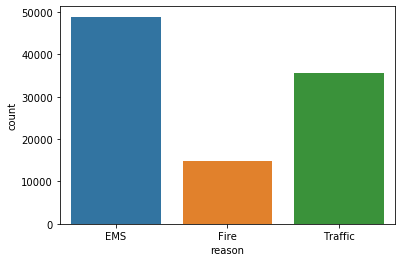

In [12]:
ax = sns.countplot(data=df, x='reason')

___
**7. Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [224]:
df.info(), type(df.timeStamp[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
reason       99492 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


(None, str)

**8. You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [225]:
df.timeStamp = pd.to_datetime(df.timeStamp)
type(df.timeStamp[0])

pandas._libs.tslibs.timestamps.Timestamp

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null datetime64[ns]
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
reason       99492 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.6+ MB


**9. You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [227]:
df.sample(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
66222,40.230934,-75.522125,LIGHTCAP RD & SANATOGA SPRINGS DR; LIMERICK; ...,19468.0,EMS: SYNCOPAL EPISODE,2016-05-31 12:12:00,LIMERICK,LIGHTCAP RD & SANATOGA SPRINGS DR,1,EMS
71538,40.185054,-75.094553,JACKSONVILLE RD & E COUNTY LINE RD; HATBORO; 2...,18974.0,Traffic: VEHICLE ACCIDENT -,2016-06-13 10:52:01,HATBORO,JACKSONVILLE RD & E COUNTY LINE RD,1,Traffic
86437,40.005934,-75.225005,CLWYD RD & LLANBERRIS RD; LOWER MERION; Stati...,19004.0,EMS: UNKNOWN MEDICAL EMERGENCY,2016-07-22 15:02:01,LOWER MERION,CLWYD RD & LLANBERRIS RD,1,EMS
96189,40.199025,-75.256704,DEKALB PIKE & PLYMOUTH RD; LOWER GWYNEDD; Sta...,19002.0,EMS: UNKNOWN MEDICAL EMERGENCY,2016-08-15 22:11:00,LOWER GWYNEDD,DEKALB PIKE & PLYMOUTH RD,1,EMS
32504,40.229008,-75.387853,RT422 BYP & RAMP RT422 EB TO RT724; CHESTER CO...,NaN,Traffic: VEHICLE ACCIDENT -,2016-02-29 15:01:00,CHESTER COUNTY,RT422 BYP & RAMP RT422 EB TO RT724,1,Traffic


In [228]:
def hour(date):
    h = date.hour
    return h

def month(date):
    m = date.month
    return m

def day(date):
    d = date.dayofweek
    return d

def date(date):
    dt = date.day
    return dt

# Checker
# hour_3 = hour(df['timeStamp'][63291])
# month_3 = month(df['timeStamp'][63291])
# day_3 = day(df['timeStamp'][63291])

# hour_3, month_3, day_3

# df['timeStamp'][63291]

In [229]:
df['hour'] = df.timeStamp.apply(lambda x: hour(x))
df['date'] = df.timeStamp.apply(lambda x: date(x))
df['month'] = df.timeStamp.apply(lambda x: month(x))
df['day_of_the_week'] = df.timeStamp.apply(lambda x: day(x))

df.sample(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,date,month,day_of_the_week
26328,40.279333,-75.647244,HEATHER PL & PRIMROSE LN; UPPER POTTSGROVE; S...,19464.0,EMS: CARDIAC EMERGENCY,2016-02-14 14:42:01,UPPER POTTSGROVE,HEATHER PL & PRIMROSE LN,1,EMS,14,14,2,6
8812,40.008346,-75.293881,ARDMORE AVE & W ATHENS AVE; LOWER MERION; Sta...,19003.0,EMS: RESPIRATORY EMERGENCY,2016-01-03 18:17:01,LOWER MERION,ARDMORE AVE & W ATHENS AVE,1,EMS,18,3,1,6
37526,40.245673,-75.279667,BROAD ST & E 6TH ST; LANSDALE; Station 345; 2...,19446.0,EMS: RESPIRATORY EMERGENCY,2016-03-14 10:57:01,LANSDALE,BROAD ST & E 6TH ST,1,EMS,10,14,3,0
1697,40.220338,-75.199595,HIGHGATE DR & HORSHAM RD; HORSHAM; Station 35...,19002.0,EMS: RESPIRATORY EMERGENCY,2015-12-15 03:17:01,HORSHAM,HIGHGATE DR & HORSHAM RD,1,EMS,3,15,12,1
68326,40.152189,-75.480512,BLACK ROCK RD; UPPER PROVIDENCE; Station 3A85...,NaN,EMS: VEHICLE ACCIDENT,2016-06-05 17:52:01,UPPER PROVIDENCE,BLACK ROCK RD,1,EMS,17,5,6,6


**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [230]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

def day_name_converter(date):
    day_name = dmap[date]
    return day_name

In [231]:
df['day_of_the_week_name'] = df.day_of_the_week.apply(lambda x: day_name_converter(x))
df.sample(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,date,month,day_of_the_week,day_of_the_week_name
76926,40.315825,-75.579793,BIG RD; NEW HANOVER; Station 332; 2016-06-27 ...,NaN,EMS: VEHICLE ACCIDENT,2016-06-27 17:07:01,NEW HANOVER,BIG RD,1,EMS,17,27,6,0,Mon
4979,40.093088,-75.083824,FORD ; CHELTENHAM; 2015-12-23 @ 17:09:43;,19006.0,Traffic: DISABLED VEHICLE -,2015-12-23 17:16:00,CHELTENHAM,FORD,1,Traffic,17,23,12,2,Wed
11286,40.102063,-75.348993,DEKALB ST & W 9TH ST; BRIDGEPORT; 2016-01-10 @...,19405.0,Fire: VEHICLE ACCIDENT,2016-01-10 00:07:00,BRIDGEPORT,DEKALB ST & W 9TH ST,1,Fire,0,10,1,6,Sun
13096,40.128119,-75.184836,DRESHERTOWN RD & CARAS CT; UPPER DUBLIN; Stat...,19034.0,EMS: CVA/STROKE,2016-01-13 20:12:00,UPPER DUBLIN,DRESHERTOWN RD & CARAS CT,1,EMS,20,13,1,2,Wed
36859,40.136335,-75.153114,BRUCE DR & DUNDEE DR; UPPER DUBLIN; 2016-03-12...,19025.0,Fire: FIRE ALARM,2016-03-12 11:12:01,UPPER DUBLIN,BRUCE DR & DUNDEE DR,1,Fire,11,12,3,5,Sat


**10. Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

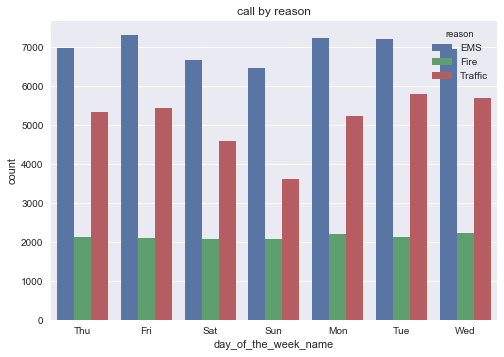

In [267]:
plt.style.use('seaborn')
ax = sns.countplot(data=df, x='day_of_the_week_name', hue='reason')
ax.set_title('call by reason')

plt.show()

**11. Now do the same for Month:**

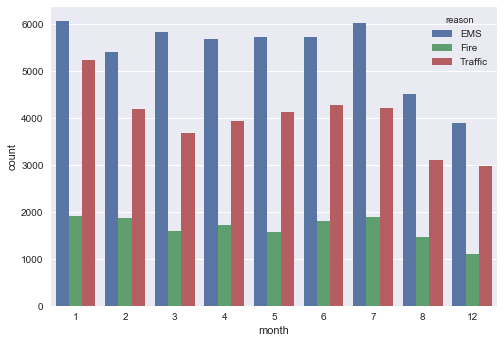

In [234]:
plt.style.use('seaborn')
ax = sns.countplot(data=df, x='month', hue='reason')

**Did you notice something strange about the Plot?**

``It is missing some months! 9,10, and 11 are not there.``

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**12. Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [235]:
byMonth = df.groupby(['month'], as_index=False).count()
byMonth

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,date,day_of_the_week,day_of_the_week_name
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


**13. Now create a simple plot off of the dataframe indicating the count of calls per month.**

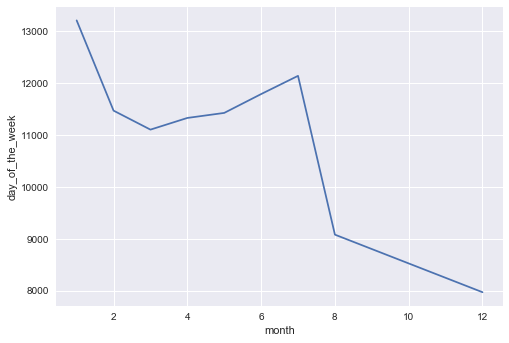

In [236]:
plt.style.use('seaborn')
ax = sns.lineplot(data=byMonth, x='month', y='day_of_the_week')

**14. Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

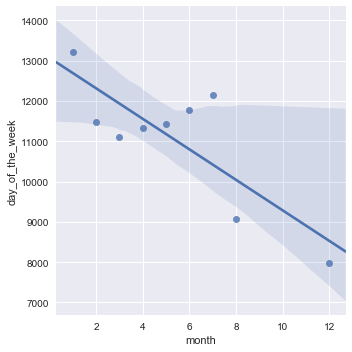

In [237]:
plt.style.use('seaborn')
ax = sns.lmplot(data=byMonth, x='month', y='day_of_the_week')

**15. Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.** 

In [239]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,date,month,day_of_the_week,day_of_the_week_name
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,10,12,3,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,10,12,3,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,10,12,3,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,10,12,3,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,10,12,3,Thu


**16. Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [244]:
byDate = df.groupby(['date'], as_index=False).count()
byDate.head()

,date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day_of_the_week,day_of_the_week_name
0,1,2876,2876,2876,2479,2876,2876,2872,2860,2876,2876,2876,2876,2876,2876
1,2,3044,3044,3044,2674,3044,3044,3041,3037,3044,3044,3044,3044,3044,3044
2,3,3215,3215,3215,2784,3215,3215,3215,3208,3215,3215,3215,3215,3215,3215
3,4,2955,2955,2955,2590,2955,2955,2952,2943,2955,2955,2955,2955,2955,2955
4,5,2964,2964,2964,2547,2964,2964,2961,2939,2964,2964,2964,2964,2964,2964


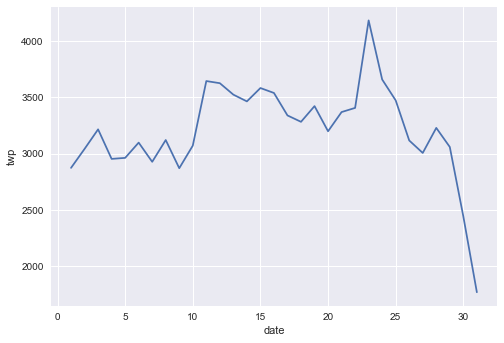

In [247]:
ax = sns.lineplot(data=byDate, x='date', y='twp')

**17. Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [246]:
ems = df[df.reason=='EMS'].groupby(['date'], as_index=False).count()
fire = df[df.reason=='Fire'].groupby(['date'], as_index=False).count()
traffic = df[df.reason=='Traffic'].groupby(['date'], as_index=False).count()

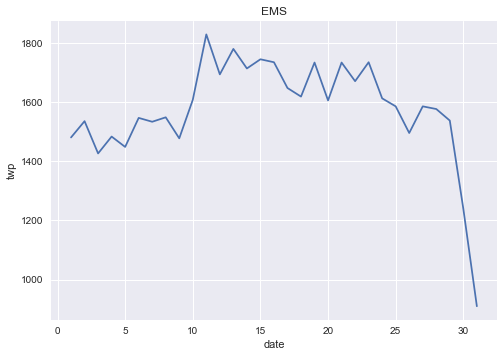

In [253]:
ax = sns.lineplot(data=ems, x='date', y='twp')
ax.set_title('Reason: EMS')

plt.show()

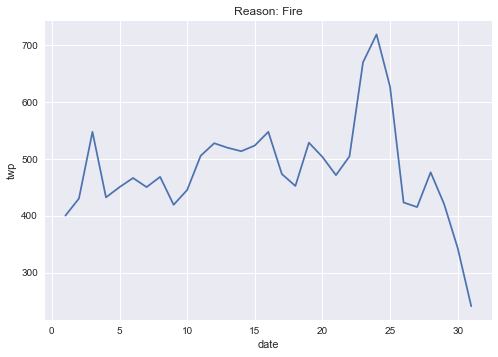

In [254]:
ax = sns.lineplot(data=fire, x='date', y='twp')
ax.set_title('Reason: Fire')

plt.show()

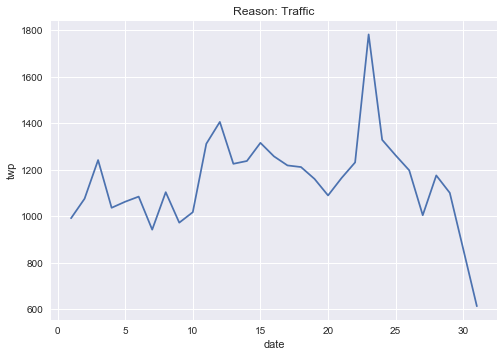

In [255]:
ax = sns.lineplot(data=traffic, x='date', y='twp')
ax.set_title('Reason: Traffic')

plt.show()

____
**18. Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [258]:
by_hour_dayoftheweek = pd.crosstab(index=df['day_of_the_week_name'], columns=df['hour'])
by_hour_dayoftheweek

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_the_week_name,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


**19. Now create a HeatMap using this new DataFrame.**

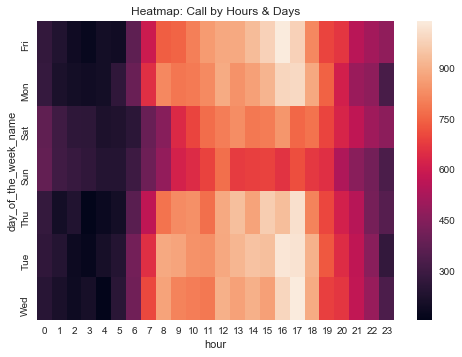

In [259]:
ax = sns.heatmap(by_hour_dayoftheweek)
ax.set_title('Heatmap: Call by Hours & Days')

plt.show()

**20. Now create a clustermap using this DataFrame.**

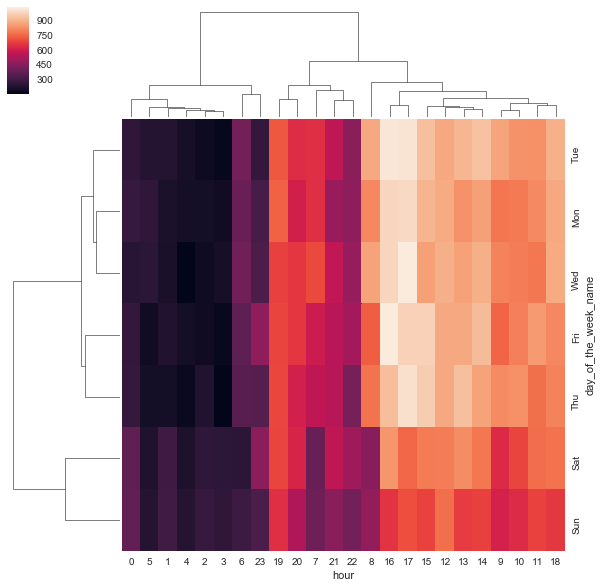

In [261]:
ax = sns.clustermap(by_hour_dayoftheweek)
# ax.set_title('Heatmap: Call by Hours & Days')

plt.show()

**21. Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [262]:
by_hour_month = pd.crosstab(index=df['day_of_the_week_name'], columns=df['month'])
by_hour_month

month,1,2,3,4,5,6,7,8,12
day_of_the_week_name,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


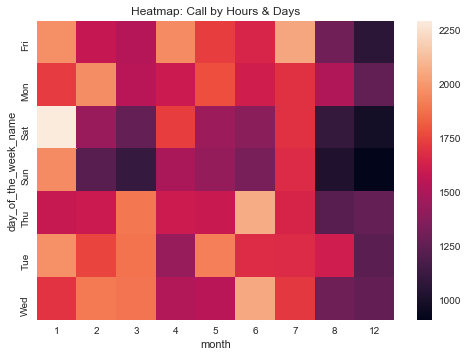

In [263]:
ax = sns.heatmap(by_hour_month)
ax.set_title('Heatmap: Call by Hours & Days')

plt.show()

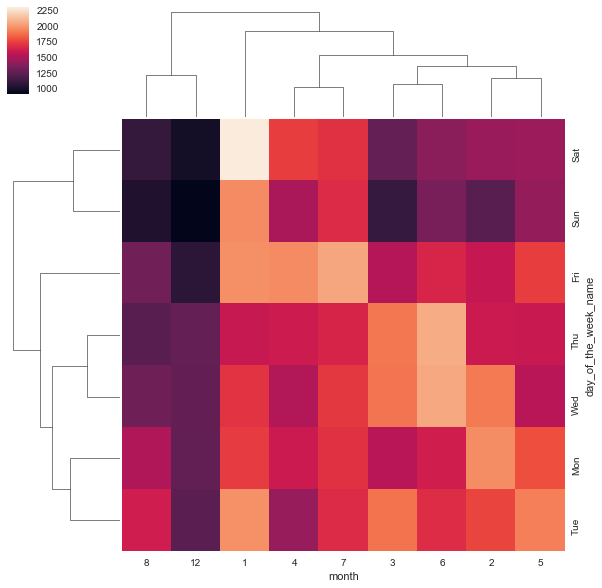

In [264]:
ax = sns.clustermap(by_hour_month)
# ax.set_title('Heatmap: Call by Hours & Days')

plt.show()

**Continue exploring the Data however you see fit!**
# Great Job!